In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import re
import phik
import warnings

from tqdm.notebook import trange, tqdm
from time import sleep
from pandas_profiling import ProfileReport
from phik import report
from phik.report import plot_correlation_matrix

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)
tqdm.pandas()

In [273]:
df = pd.read_csv('/Users/prime/Documents/data/kaggle/cars Russia/archive/region25_en.csv')

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513200 entries, 0 to 1513199
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   brand                 1513200 non-null  object 
 1   name                  1513200 non-null  object 
 2   bodyType              1513200 non-null  object 
 3   color                 1403466 non-null  object 
 4   fuelType              1509640 non-null  object 
 5   year                  1102226 non-null  float64
 6   mileage               1498720 non-null  float64
 7   transmission          1510135 non-null  object 
 8   power                 1492313 non-null  float64
 9   price                 1513200 non-null  int64  
 10  vehicleConfiguration  1102226 non-null  object 
 11  engineName            1101142 non-null  object 
 12  engineDisplacement    1092435 non-null  object 
 13  date                  1513200 non-null  object 
 14  location              1513200 non-

In [275]:
df.columns = ['brand', 'name', 'body_type', 'color', 'fuel_type', 'year', 'mileage',
       'transmission', 'power', 'price', 'vehicle_configuration', 'engine_name',
       'engine_displacement', 'date', 'location', 'link', 'parse_date']

In [276]:
def check(df):
    l = []
    columns = df.columns
    for col in tqdm(columns):
        dtypes = df[col].dtypes
        nunique = df[col].nunique()
        len_col = len(df[col])
        sum_nan = df[col].isna().sum()
        count = df[col].count()
        per_nan = sum_nan/len_col * 100
        l.append([col, dtypes, nunique, len_col, sum_nan, count, per_nan])
    df_check = pd.DataFrame(l)
    df_check.columns=['column', 'dtypes', 'nunique', 'len_col', 'sum_nan', 'count', 'per_nan']
    return df_check

df_check = check(df)

display(df_check)

  0%|          | 0/17 [00:00<?, ?it/s]

,column,dtypes,nunique,len_col,sum_nan,count,per_nan
0,brand,object,74,1513200,0,1513200,0.00
1,name,object,1026,1513200,0,1513200,0.00
2,body_type,object,11,1513200,0,1513200,0.00
3,color,object,15,1513200,109734,1403466,7.25
4,fuel_type,object,3,1513200,3560,1509640,0.24
5,year,float64,59,1513200,410974,1102226,27.16
6,mileage,float64,541,1513200,14480,1498720,0.96
7,transmission,object,5,1513200,3065,1510135,0.20
8,power,float64,352,1513200,20887,1492313,1.38
9,price,int64,2986,1513200,0,1513200,0.00


In [277]:
display(df.sample(20))

,brand,name,body_type,color,fuel_type,year,mileage,transmission,power,price,vehicle_configuration,engine_name,engine_displacement,date,location,link,parse_date
353924,Daihatsu,Move,hatchback 5 doors,white,Gasoline,2008.00,110000.00,CVT,64.00,420000,660 custom RS,KF-DET,0.7 LTR,2022-08-28 00:00:00,Vladivostok,https://vladivostok.drom.ru/daihatsu/move/4728...,2022-08-28 19:00:00
942265,Honda,Freed,minivan,blue,Gasoline,2015.00,69000.00,CVT,88.00,900000,1.5 Premium Edition (7-Seater),LEA,1.5 LTR,2022-09-10 00:00:00,Spassk-Dalnij,https://spassk-dalniy.drom.ru/honda/freed/4785...,2022-09-10 19:00:00
876160,Toyota,Hiace,minivan,white,Diesel,NaN,69000.00,Automatic,144.00,2650000,NaN,NaN,NaN,2022-09-08 00:00:00,Vladivostok,https://vladivostok.drom.ru/toyota/hiace/48173...,2022-09-09 10:00:00
1384429,Toyota,Rush,jeep 5 doors,brown,Gasoline,2010.00,89000.00,AT,109.00,1185000,1.5 X smart edition 4WD,3SZ-VE,1.5 LTR,2022-09-22 00:00:00,Ussurijsk,https://ussuriisk.drom.ru/toyota/rush/47986124...,2022-09-22 19:00:00
561040,Toyota,Prius,liftback,silver,Gasoline,2008.00,203000.00,CVT,76.00,560000,1.5 S,1NZ-FXE,1.5 LTR,2022-09-01 00:00:00,Vladivostok,https://vladivostok.drom.ru/toyota/prius/46302...,2022-09-02 03:00:00
421541,Toyota,Corolla Rumion,hatchback 5 doors,burgundy,Gasoline,2013.00,86000.00,CVT,109.00,785000,1.5 X Aero Tourer,1NZ-FE,1.5 LTR,2022-08-29 00:00:00,Vladivostok,https://vladivostok.drom.ru/toyota/corolla_rum...,2022-08-30 05:00:00
910987,Nissan,X-Trail,jeep 5 doors,black,Gasoline,NaN,107000.00,CVT,147.00,1599999,NaN,NaN,NaN,2022-09-09 00:00:00,Spassk-Dalnij,https://spassk-dalniy.drom.ru/nissan/x-trail/4...,2022-09-10 04:00:00
1004300,Honda,Stream,minivan,black,Gasoline,2006.00,1000.00,AT,140.00,650000,1.8 RSZ,R18A,1.8 LTR,2022-09-12 00:00:00,Vladivostok,https://vladivostok.drom.ru/honda/stream/47779...,2022-09-12 16:00:00
780926,Honda,Vezel,jeep 5 doors,white,Gasoline,2016.00,57000.00,Robot,132.00,1550000,1.5 Hybrid X Honda Sensing 4WD,LEB,1.5 LTR,2022-09-07 00:00:00,Vladivostok,https://vladivostok.drom.ru/honda/vezel/477488...,2022-09-07 11:00:00
198567,Lexus,NX200,jeep 5 doors,grey,Gasoline,2020.00,43000.00,CVT,150.00,3700000,2.0 CVT AWD Black Vision,3ZR-FAE,2.0 LTR,2022-08-25 00:00:00,Vladivostok,https://vladivostok.drom.ru/lexus/nx200/480106...,2022-08-25 11:00:00


In [278]:
display(df[df['year'].isna() & df['engine_displacement'].notna()].count())

brand                    0
name                     0
body_type                0
color                    0
fuel_type                0
year                     0
mileage                  0
transmission             0
power                    0
price                    0
vehicle_configuration    0
engine_name              0
engine_displacement      0
date                     0
location                 0
link                     0
parse_date               0
dtype: int64

In [279]:
len(df)

1513200

In [280]:
df.dropna(subset = ['year'], inplace = True)

In [281]:
len(df)

1102226

In [282]:
check(df)

  0%|          | 0/17 [00:00<?, ?it/s]

,column,dtypes,nunique,len_col,sum_nan,count,per_nan
0,brand,object,67,1102226,0,1102226,0.00
1,name,object,869,1102226,0,1102226,0.00
2,body_type,object,11,1102226,0,1102226,0.00
3,color,object,15,1102226,78528,1023698,7.12
4,fuel_type,object,3,1102226,9,1102217,0.00
5,year,float64,59,1102226,0,1102226,0.00
6,mileage,float64,488,1102226,13147,1089079,1.19
7,transmission,object,4,1102226,0,1102226,0.00
8,power,float64,318,1102226,9478,1092748,0.86
9,price,int64,2743,1102226,0,1102226,0.00


In [283]:
for col in tqdm(['color', 'mileage', 'power', 'engine_name', 'engine_displacement']):
    df[col] = df.groupby([
        'brand', 'name', 'year', 'vehicle_configuration'])[col].apply(lambda x: x.fillna(x.mode(dropna=False)[0]))

  0%|          | 0/5 [00:00<?, ?it/s]

In [284]:
df.isna().sum()

brand                        0
name                         0
body_type                    0
color                    40415
fuel_type                    9
year                         0
mileage                  11252
transmission                 0
power                     9478
price                        0
vehicle_configuration        0
engine_name               1084
engine_displacement       9791
date                         0
location                     0
link                         0
parse_date                   0
dtype: int64

In [285]:
len(df)

1102226

In [286]:
df = df.dropna().reset_index()

In [287]:
len(df)

1041384

In [288]:
df['engine_displacement'] = df['engine_displacement'].progress_apply(lambda x: re.sub("[^0-9.]", "", x))

  0%|          | 0/1041384 [00:00<?, ?it/s]

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041384 entries, 0 to 1041383
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   index                  1041384 non-null  int64  
 1   brand                  1041384 non-null  object 
 2   name                   1041384 non-null  object 
 3   body_type              1041384 non-null  object 
 4   color                  1041384 non-null  object 
 5   fuel_type              1041384 non-null  object 
 6   year                   1041384 non-null  float64
 7   mileage                1041384 non-null  float64
 8   transmission           1041384 non-null  object 
 9   power                  1041384 non-null  float64
 10  price                  1041384 non-null  int64  
 11  vehicle_configuration  1041384 non-null  object 
 12  engine_name            1041384 non-null  object 
 13  engine_displacement    1041384 non-null  object 
 14  date              

In [290]:
convert_dict = {"year": int, 
                "mileage": int,
                "power": int,
                "engine_displacement": float,
                "date": 'datetime64',
                "parse_date": 'datetime64'
               } 
  
df = df.astype(convert_dict)

In [291]:
df['lifetime'] = df['parse_date'] - df['date']
df['lifetime'] = df['lifetime'].astype('timedelta64[h]')
df = df.drop(['index', 'link', 'parse_date', 'date'], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041384 entries, 0 to 1041383
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   brand                  1041384 non-null  object 
 1   name                   1041384 non-null  object 
 2   body_type              1041384 non-null  object 
 3   color                  1041384 non-null  object 
 4   fuel_type              1041384 non-null  object 
 5   year                   1041384 non-null  int64  
 6   mileage                1041384 non-null  int64  
 7   transmission           1041384 non-null  object 
 8   power                  1041384 non-null  int64  
 9   price                  1041384 non-null  int64  
 10  vehicle_configuration  1041384 non-null  object 
 11  engine_name            1041384 non-null  object 
 12  engine_displacement    1041384 non-null  float64
 13  location               1041384 non-null  object 
 14  lifetime          

In [292]:
df['age'] = 2022 - df['year']

In [293]:
df['age'].min()

0

In [294]:
def mil_year(df):
    if df['age'] != 0:
        a = round((df['mileage'] / df['age']), 0)
    else:
        a = round((df['mileage']), 0)
    return a

In [295]:
df['mil_year'] = df.progress_apply(mil_year, axis=1)
df['mil_year'] = df['mil_year'].astype('int64')

  0%|          | 0/1041384 [00:00<?, ?it/s]

In [296]:
df['tax_low'] = pd.cut(df['power'], bins=[0, 249, df['power'].max()], labels=['1', '0'])
df['tax_low'] = df['tax_low'].astype('category')

In [297]:
display(df['name'].value_counts())
print(df.shape)

Land Cruiser Prado    54380
Prius                 41709
Harrier               31717
Fit                   27803
Corolla Fielder       24654
                      ...  
Tracker                   2
LS400                     2
Galloper                  1
Rafaga                    1
BT-50                     1
Name: name, Length: 840, dtype: int64

(1041384, 18)


In [298]:
shape_name_old = df.shape[0]

group_count = df.groupby('name')['price'].count()
drop_models = group_count[group_count <=15].index
df = df[~df['name'].isin(drop_models)]

print("Разница после преобразования:", shape_name_old - df.shape[0])

Разница после преобразования: 609


In [299]:
brand_list = set(df['brand'])
print(brand_list)

{'Jaguar', 'Lada', 'Volkswagen', 'Honda', 'UAZ', 'Exeed', 'IZh', 'Bentley', 'Hyundai', 'Chevrolet', 'Kia', 'Acura', 'Audi', 'Mini', 'Zotye', 'Dodge', 'Genesis', 'Isuzu', 'Mazda', 'LuAZ', 'Mercedes-Benz', 'Citroen', 'Chery', 'Land Rover', 'Smart', 'Lincoln', 'Datsun', 'Toyota', 'GAZ', 'Daewoo', 'Skoda', 'SsangYong', 'Maserati', 'Jeep', 'Porsche', 'Opel', 'Mitsubishi', 'Haval', 'ZAZ', 'BMW', 'Daihatsu', 'Infiniti', 'Lexus', 'Moskvich', 'Geely', 'Rover', 'Fiat', 'Hummer', 'Nissan', 'Peugeot', 'Cadillac', 'Subaru', 'Volvo', 'Ford', 'Vortex', 'Chrysler', 'Ram', 'Suzuki', 'Renault'}


In [300]:
country_brand = {
    'Russia': ['UAZ', 'GAZ', 'Moskvich', 'ZAZ', 'IZh', 'Lada'],
    'Great Britain': ['Jaguar', 'Bentley', 'Land Rover', 'Rover'],
    'Japan': ['Nissan', 'Infiniti', 'Isuzu', 'Mazda', 'Mitsubishi', 'Toyota', 'Daihatsu', 'Datsun', 'Lexus', 'Acura', 'Subaru', 'Suzuki', 'Honda'],
    'Germany': ['Mini', 'Mercedes-Benz', 'BMW', 'Audi', 'Volkswagen', 'Opel', 'Smart', 'Porsche'],
    'USA': ['Chrysler', 'Vortex', 'Lincoln', 'Cadillac', 'Jeep', 'Dodge', 'Ford', 'Hummer', 'Ram', 'Chevrolet'],
    'South Korea': ['Genesis', 'Kia', 'Daewoo', 'Hyundai'],
    'China': ['Zotye', 'SsangYong', 'Exeed', 'Geely', 'Haval', 'Chery'],
    'France': ['Peugeot', 'Citroen', 'Renault'],
    'Sweden': ['Volvo'],
    'Italy': ['Maserati', 'Fiat'],
    'Ukraine': ['LuAZ'],
    'Czech': ['Skoda']
}

In [301]:
country = list(country_brand.keys())
brand = list(country_brand.values())

df_country_brand = pd.DataFrame(list(zip(country_brand.keys(), country_brand.values())), columns = [
    'key', 'value'])
df_country_brand = df_country_brand.explode('value')

brand = list(df_country_brand['value'])
country = list(df_country_brand['key'])

brand_country = dict(zip(brand, country))

In [302]:
df['country'] = df['brand']

df['country'] = df['country'].replace(brand_country)
display(df.sample(10))

,brand,name,body_type,color,fuel_type,year,mileage,transmission,power,price,vehicle_configuration,engine_name,engine_displacement,location,lifetime,age,mil_year,tax_low,country
694912,Lexus,LS600hL,sedan,beige,Gasoline,2007,155000,CVT,394,1380000,5.0 CVT Premium,2UR-FSE,5.00,Dalnerechensk,41.00,15,10333,0,Japan
126581,Nissan,Cube,hatchback 5 doors,grey,Gasoline,2002,295000,AT,98,175000,1.4 SX,CR14DE,1.40,Artem,26.00,20,14750,1,Japan
985325,Toyota,Prius,liftback,white,Gasoline,2015,91000,CVT,98,1300000,1.8 A,2ZR-FXE,1.80,Ussurijsk,21.00,7,13000,1,Japan
563190,Land Rover,Range Rover,jeep 5 doors,black,Diesel,2009,180000,AT,313,1699990,4.4 TD AT Westminster,448DT,4.40,Vladivostok,28.00,13,13846,0,Great Britain
849478,Lexus,NX300h,jeep 5 doors,grey,Gasoline,2014,102000,CVT,155,2750000,2.5 CVT AWD F SPORT,2AR-FXE,2.50,Nahodka,12.00,8,12750,1,Japan
1013121,Toyota,Vitz,hatchback 3 door,grey,Gasoline,2000,162000,AT,88,280000,1.3 RS,2NZ-FE,1.30,Artem,17.00,22,7364,1,Japan
271895,Toyota,Aqua,hatchback 5 doors,blue,Gasoline,2018,84000,CVT,74,820000,1.5 S,1NZ-FXE,1.50,Vladivostok,13.00,4,21000,1,Japan
1023710,Mazda,Demio,hatchback 5 doors,blue,Gasoline,2011,141000,AT,91,460000,1.3 13C 4WD,ZJ-VE,1.30,Vladivostok,27.00,11,12818,1,Japan
908237,Lada,Vesta,sedan,silver,Gasoline,2015,87000,Robot,106,645000,1.6 AMT Luxe + Lime Multimedia пакет X4P,VAZ-21129,1.60,Vladivostok,31.00,7,12429,1,Russia
384793,Suzuki,Swift,hatchback 5 doors,grey,Gasoline,2014,90000,CVT,91,569000,1.2 Style,K12B,1.20,Ussurijsk,24.00,8,11250,1,Japan


In [303]:
def describe_plus(df):
    l = []
    for col in tqdm(df.columns):
        if (df[col].dtype == np.float64 or df[col].dtype == np.int64):
            count = df[col].count()
            mean = df[col].mean()
            std = df[col].std()
            min_n = df[col].min()
            per_1, per_25, per_50, per_75, per_99 = np.percentile(df[col], [
                1, 25, 50, 75, 99
            ])
            max_n = df[col].max()
            iqr = per_75 - per_25
            min_1_5_iqr = per_25 - 1.5*iqr
            if min_1_5_iqr < min_n:
                min_1_5_iqr = min_n

            max_1_5_iqr = per_75 + 1.5*iqr
            if max_1_5_iqr > max_n:
                max_1_5_iqr = max_n

            l.append([
                col, count, mean, std, min_n, per_1, per_25, per_50, per_75, per_99, max_n, iqr, min_1_5_iqr, max_1_5_iqr
            ])
    df_describe = pd.DataFrame(l)
    df_describe.columns = [
        'column', 'count', 'mean', 'std', 'min', '1%', '25%', '50%', '75%', '99%', 'max', 'iqr', '-1.5iqr', '+1.5iqr'
    ]
    df_describe = df_describe.set_index('column')
    return df_describe


df_describe = describe_plus(df)
display(df_describe.T)

  0%|          | 0/19 [00:00<?, ?it/s]

column,year,mileage,power,price,engine_displacement,lifetime,age,mil_year
count,1040775.00,1040775.00,1040775.00,1040775.00,1040775.00,1040775.00,1040775.00,1040775.00
mean,2010.14,128000.73,149.54,1484010.82,2.07,21.29,11.86,11903.29
std,7.60,82064.49,72.45,1673317.06,0.90,9.30,7.60,6113.59
min,1948.00,1000.00,30.00,20000.00,0.50,0.00,0.00,14.00
1%,1990.00,1000.00,52.00,100000.00,0.70,1.00,2.00,77.00
25%,2006.00,69000.00,99.00,570000.00,1.50,15.00,6.00,7931.00
50%,2012.00,119000.00,135.00,950000.00,1.80,21.00,10.00,11250.00
75%,2016.00,179000.00,174.00,1810000.00,2.50,29.00,16.00,15000.00
99%,2020.00,350000.00,405.00,7800000.00,5.50,40.00,32.00,30000.00
max,2022.00,1000000.00,625.00,41500000.00,6.40,50.00,74.00,125000.00


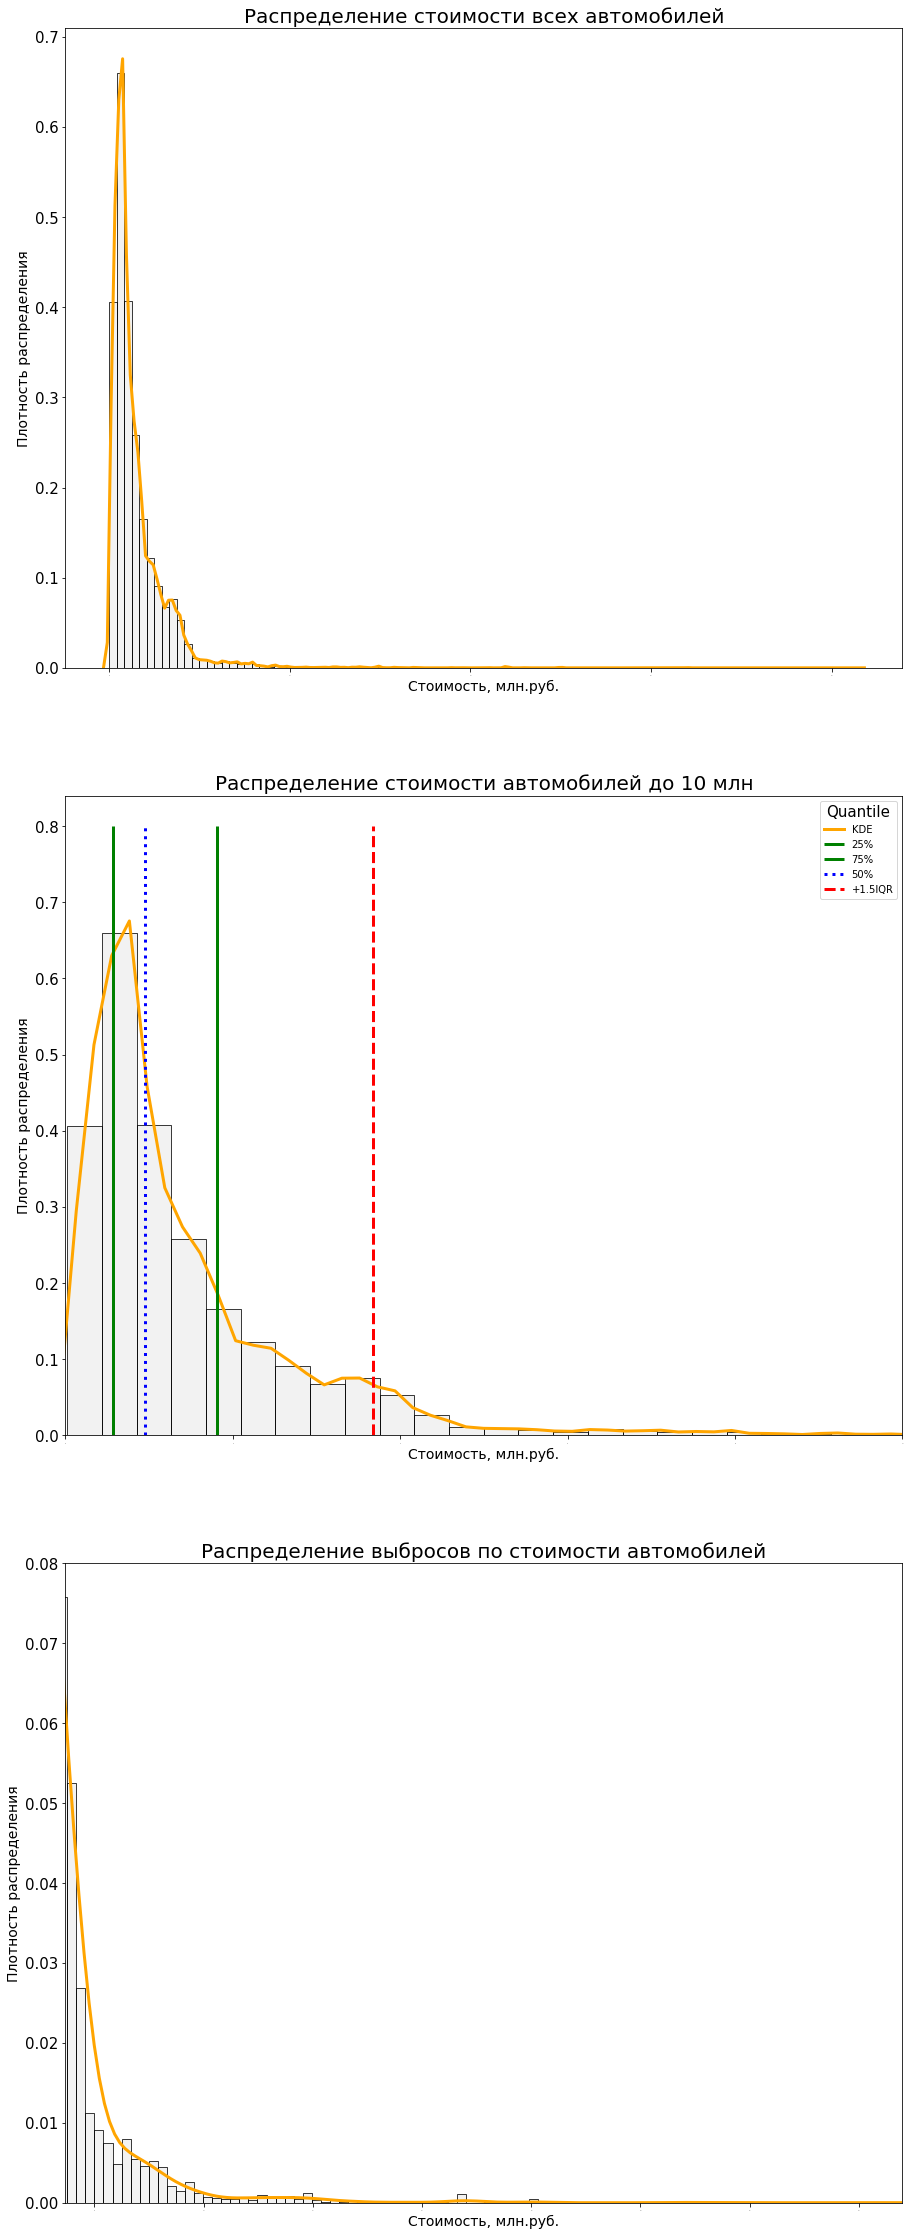

In [304]:
price_mln = df['price'] / 1000000

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 40))

sns.histplot(x=price_mln, bins=100, color='grey', stat='density', alpha=.1, ax=ax[0])
sns.kdeplot(x=price_mln, color='orange', linewidth=3, ax=ax[0])
ax[0].set_title('Распределение стоимости всех автомобилей', fontsize=20)
ax[0].set_xlabel('Стоимость, млн.руб.', fontsize=14)
ax[0].set_ylabel('Плотность распределения', fontsize=14)


sns.histplot(x=price_mln, bins=100, color='grey', stat='density', alpha=.1, ax=ax[1])
sns.kdeplot(x=price_mln, color='orange', label="KDE", linewidth=3, ax=ax[1])
ax[1].set_xlim([0, 10])
ax[1].vlines(np.percentile(price_mln, 25), 0, .8, linestyles="solid",
             colors="g", linewidth=3, label='25%')
ax[1].vlines(np.percentile(price_mln, 75), 0, .8, linestyles="solid",
             colors="g", linewidth=3, label='75%')
ax[1].vlines(np.percentile(price_mln, 50), 0, .8, linestyles="dotted",
             colors="b", linewidth=3, label='50%')
ax[1].vlines(np.percentile(price_mln, 75) + 1.5*(np.percentile(price_mln, 75) - np.percentile(price_mln, 25)),
             0, .8, linestyles="dashed", colors="r", linewidth=3, label='+1.5IQR')
ax[1].set_title('Распределение стоимости автомобилей до 10 млн', fontsize=20)
ax[1].set_xlabel('Стоимость, млн.руб.', fontsize=14)
ax[1].set_ylabel('Плотность распределения', fontsize=14)
ax[1].legend(title='Quantile', shadow=False,
             title_fontsize=15, fontsize=10, loc='upper right')


sns.histplot(x=price_mln, bins=100, color='grey', stat='density', alpha=.1, ax=ax[2])
sns.kdeplot(x=price_mln, color='orange', linewidth=3, bw_method=.5, ax=ax[2])
ax[2].set_xlim([np.percentile(price_mln, 75) + 1.5 *
               (np.percentile(price_mln, 75) - np.percentile(price_mln, 25)), 42])
ax[2].set_ylim([0, .08])
ax[2].set_title('Распределение выбросов по стоимости автомобилей', fontsize=20)
ax[2].set_xlabel('Стоимость, млн.руб.', fontsize=14)
ax[2].set_ylabel('Плотность распределения', fontsize=14)

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

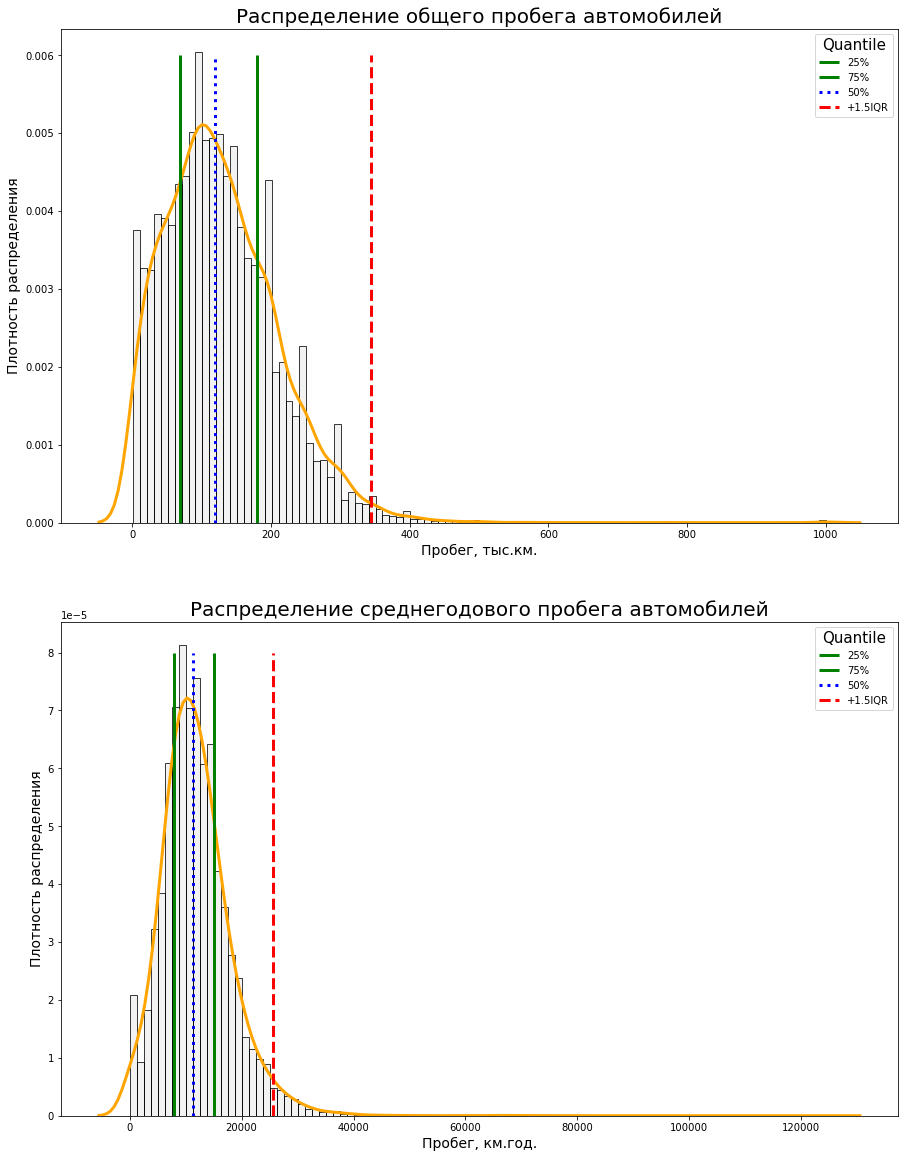

In [305]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 20))

sns.histplot(x=df['mileage'] / 1000, bins=100,
             color='grey', stat='density', alpha=.1, ax=ax[0])
sns.kdeplot(x=df['mileage'] / 1000, color='orange',
            linewidth=3, bw_method=.2, ax=ax[0])
ax[0].set_title('Распределение общего пробега автомобилей', fontsize=20)
ax[0].set_xlabel('Пробег, тыс.км.', fontsize=14)
ax[0].set_ylabel('Плотность распределения', fontsize=14)
ax[0].vlines(np.percentile(df['mileage'] / 1000, 25), 0, .006, linestyles="solid",
             colors="g", linewidth=3, label='25%')
ax[0].vlines(np.percentile(df['mileage'] / 1000, 75), 0, .006, linestyles="solid",
             colors="g", linewidth=3, label='75%')
ax[0].vlines(np.percentile(df['mileage'] / 1000, 50), 0, .006, linestyles="dotted",
             colors="b", linewidth=3, label='50%')
ax[0].vlines(np.percentile(df['mileage'] / 1000, 75) + 1.5*(np.percentile(df['mileage'] / 1000, 75) - np.percentile(df['mileage'] / 1000, 25)),
             0, .006, linestyles="dashed", colors="r", linewidth=3, label='+1.5IQR')
ax[0].legend(title='Quantile', shadow=False,
             title_fontsize=15, fontsize=10, loc='upper right')

sns.histplot(x=df['mil_year'], bins=100,
             color='grey', stat='density', alpha=.1, ax=ax[1])
sns.kdeplot(x=df['mil_year'], color='orange',
            linewidth=3, bw_method=.3, ax=ax[1])
ax[1].set_title('Распределение среднегодового пробега автомобилей', fontsize=20)
ax[1].set_xlabel('Пробег, км.год.', fontsize=14)
ax[1].set_ylabel('Плотность распределения', fontsize=14)
ax[1].vlines(np.percentile(df['mil_year'], 25), 0, .00008, linestyles="solid",
             colors="g", linewidth=3, label='25%')
ax[1].vlines(np.percentile(df['mil_year'], 75), 0, .00008, linestyles="solid",
             colors="g", linewidth=3, label='75%')
ax[1].vlines(np.percentile(df['mil_year'], 50), 0, .00008, linestyles="dotted",
             colors="b", linewidth=3, label='50%')
ax[1].vlines(np.percentile(df['mil_year'], 75) + 1.5*(np.percentile(df['mil_year'], 75) - np.percentile(df['mil_year'], 25)),
             0, .00008, linestyles="dashed", colors="r", linewidth=3, label='+1.5IQR')
ax[1].legend(title='Quantile', shadow=False,
             title_fontsize=15, fontsize=10, loc='upper right')

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

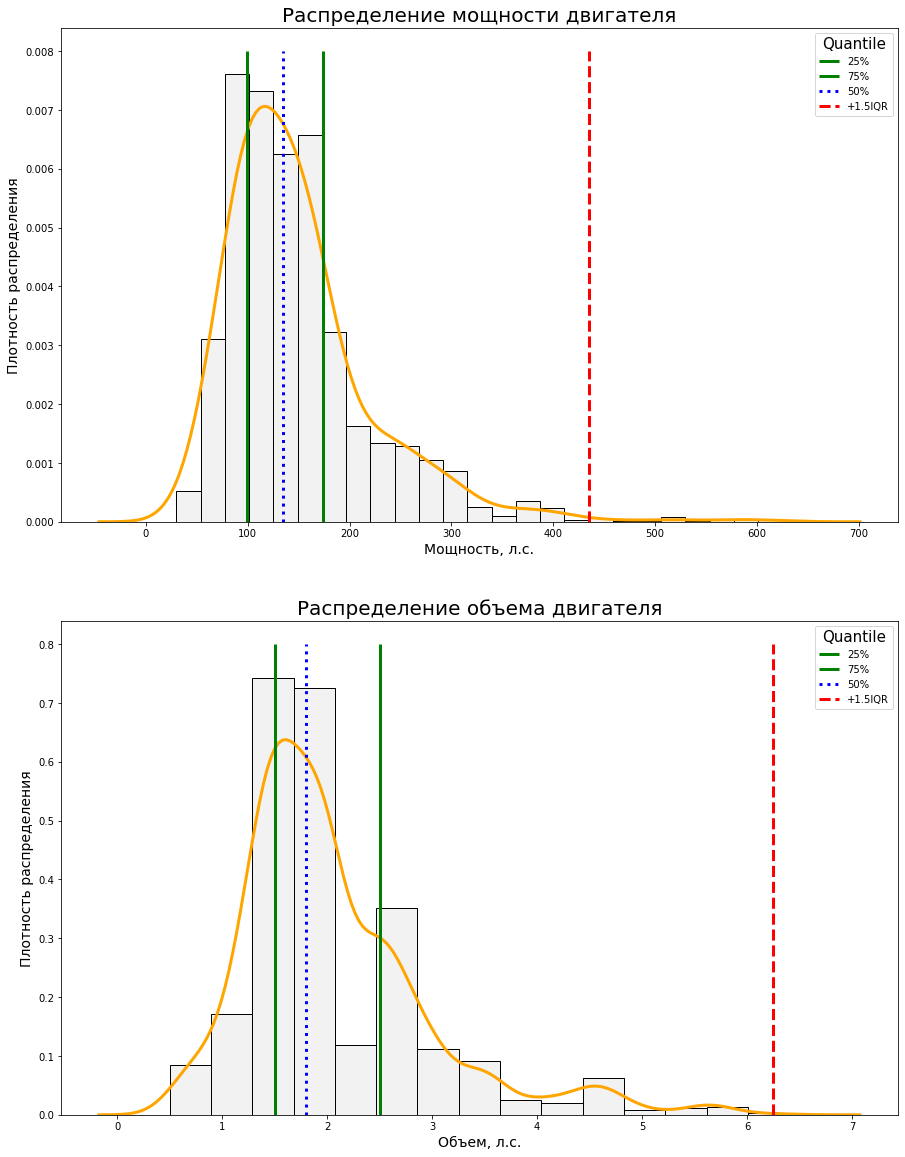

In [306]:

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 20))


sns.histplot(x = df['power'], bins = 25, color = 'grey', stat='density', alpha=.1, ax=ax[0])
sns.kdeplot(x=df['power'], color='orange',
            linewidth=3, bw_method=.35, ax=ax[0])
ax[0].set_title('Распределение мощности двигателя', fontsize=20)
ax[0].set_xlabel('Мощность, л.с.', fontsize=14)
ax[0].set_ylabel('Плотность распределения', fontsize=14)
ax[0].vlines(np.percentile(df['power'], 25), 0, .008, linestyles="solid",
             colors="g", linewidth=3, label='25%')
ax[0].vlines(np.percentile(df['power'], 75), 0, .008, linestyles="solid",
             colors="g", linewidth=3, label='75%')
ax[0].vlines(np.percentile(df['power'], 50), 0, .008, linestyles="dotted",
             colors="b", linewidth=3, label='50%')
ax[0].vlines(np.percentile(df['power'], 75) + 1.5*(np.percentile(df['power'], 75) - np.percentile(df['power'] / 1000, 25)),
             0, .008, linestyles="dashed", colors="r", linewidth=3, label='+1.5IQR')
ax[0].legend(title='Quantile', shadow=False,
             title_fontsize=15, fontsize=10, loc='upper right')


sns.histplot(x = df['engine_displacement'], bins = 15, color = 'grey', stat='density', alpha=.1, ax=ax[1])
sns.kdeplot(x=df['engine_displacement'], color='orange',
            linewidth=3, bw_method=.25, ax=ax[1])
ax[1].set_title('Распределение объема двигателя', fontsize=20)
ax[1].set_xlabel('Объем, л.с.', fontsize=14)
ax[1].set_ylabel('Плотность распределения', fontsize=14)
ax[1].vlines(np.percentile(df['engine_displacement'], 25), 0, .8, linestyles="solid",
             colors="g", linewidth=3, label='25%')
ax[1].vlines(np.percentile(df['engine_displacement'], 75), 0, .8, linestyles="solid",
             colors="g", linewidth=3, label='75%')
ax[1].vlines(np.percentile(df['engine_displacement'], 50), 0, .8, linestyles="dotted",
             colors="b", linewidth=3, label='50%')
ax[1].vlines(np.percentile(df['engine_displacement'], 75) + 1.5*(np.percentile(df['engine_displacement'], 75) - np.percentile(df['engine_displacement'] / 1000, 25)),
             0, .8, linestyles="dashed", colors="r", linewidth=3, label='+1.5IQR')
ax[1].legend(title='Quantile', shadow=False,
             title_fontsize=15, fontsize=10, loc='upper right')

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

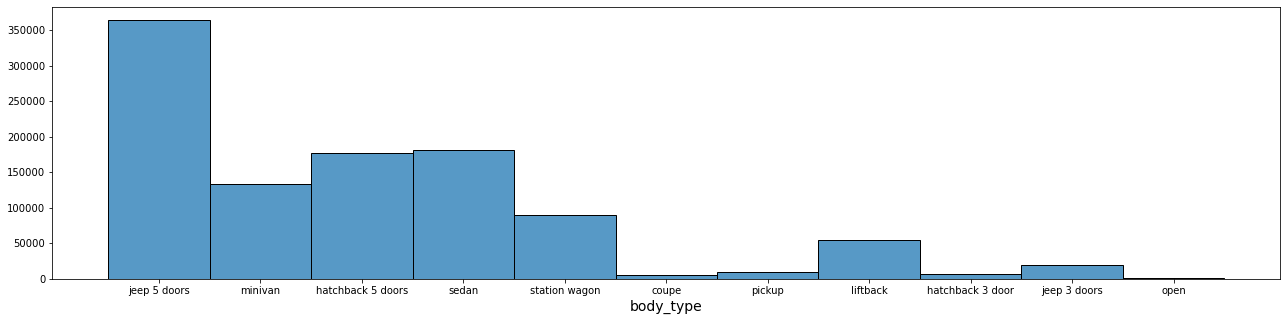

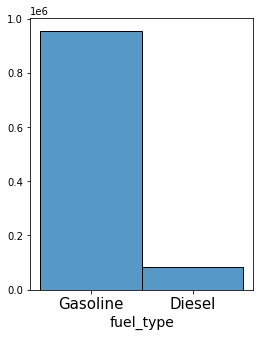

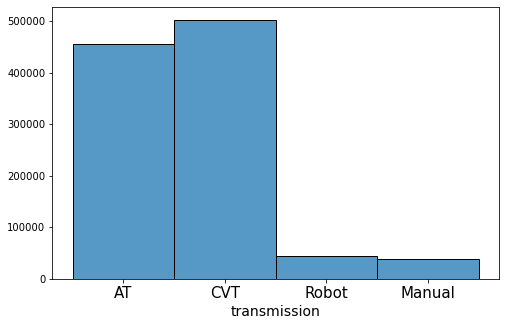

KeyError: 'actual_year'

In [307]:
columns = ['body_type', 'fuel_type', 'transmission', 'tax_low']
for col in columns:
    plt.figure(figsize=(df[col].nunique() * 2, 5))
    sns.histplot(data = df, x = col, multiple = 'stack')
    plt.xlabel(col, fontsize=14)
    plt.ylabel('', fontsize=14)
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=10)
    plt.show()

In [ ]:
df_pivot_brand = df.pivot_table(index = ['brand'], values = ['name'], 
            aggfunc={'name': 'count'}).sort_values(by='name', ascending = False).reset_index()

plt.figure(figsize=(20, 20))
sns.barplot(data=df_pivot_brand,
           y='brand',
           x='name',
           palette='rocket_r')
plt.grid()
plt.title('Количество объявлений по брендам', fontsize=20)
plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [ ]:
plt.figure(figsize=(20, 20))
sns.barplot(data=df_pivot_brand.loc[10:,:],
           y='brand',
           x='name',
           palette='rocket_r')
plt.grid()
plt.title('Количество объявлений по брендам без десятки лидеров', fontsize=20)
plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df.pivot_table(index=['country'], values=['name'],
                                aggfunc={'name': 'count'}).sort_values(by='name', ascending=False).reset_index(),
            y='country',
            x='name',
            palette='rocket_r')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.grid()
plt.title('Количество объявлений по странам производителей', fontsize=20)
plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df.pivot_table(index=['country'], values=['name'],
                                aggfunc={'name': 'count'}).sort_values(by='name', ascending=False).reset_index().loc[1:, :],
            y='country',
            x='name',
            palette='rocket_r')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.grid()
plt.title('Количество объявлений по странам производителей без лидера', fontsize=20)
plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [ ]:
plt.figure(figsize=(15, 20))
sns.barplot(data=df.pivot_table(index = ['location'], values = ['name'], 
                                 aggfunc={'name': 'count'}).sort_values(by='name', ascending = False).reset_index(),
           y='location',
           x='name',
           palette='rocket_r')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.grid()
plt.title('Количество объявлений по месту расположения', fontsize=20)
plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [ ]:
plt.figure(figsize=(15, 20))
sns.barplot(data=df.pivot_table(index = ['location'], values = ['name'], 
                                 aggfunc={'name': 'count'}).sort_values(by='name', ascending = False).reset_index().loc[10:,:],
           y='location',
           x='name',
           palette='rocket_r')
plt.grid()
plt.title('Количество объявлений по месту расположения без десятки лидеров', fontsize=20)
plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [ ]:
df_pivot_year = df.pivot_table(index=['year'], values=['name'],
                                aggfunc={'name': 'count'}).sort_values(by='year', ascending=False)


In [ ]:
plt.figure(figsize = (1.5, 25))
sns.heatmap(df_pivot_year, annot = True, annot_kws = {'size':15}, linewidth = .02, linecolor = 'white', fmt = '.0f')
plt.title('Количество объявлений по году выпуска автомобилей \n  ', fontsize=20)
plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
plt.rc('xtick', labelsize=0)
plt.rc('ytick', labelsize=15)
plt.show()

In [ ]:
df_corr = df.select_dtypes(include=np.number)
plt.figure(figsize=(25,10))
mask = np.triu(np.ones_like(df_corr.corr(), dtype=np.bool))
sns.heatmap(df_corr.corr(), xticklabels=df_corr.corr().columns, mask=mask, cmap='RdYlGn', annot_kws = {'size':15}, center=0, annot=True)

plt.title('Корреляция числовых признаков', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
# phik_overview = df.phik_matrix(interval_cols=df_corr)
# phik_overview.round(2)


In [ ]:
# plot_correlation_matrix(phik_overview.values, 
#                         x_labels=phik_overview.columns, 
#                         y_labels=phik_overview.index, 
#                         vmin=0, vmax=1, color_map="Greens", 
#                         title=r"Коэффициент $\phi_K$", 
#                         fontsize_factor=1.5, 
#                         figsize=(20, 20))
# plt.tight_layout()

In [626]:
# significance_overview = df.significance_matrix(interval_cols=df_corr)
# significance_overview.round(2)


/Users/prime/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable engine_name is large: 1087. Are you sure this is not an interval variable? Analysis for pairs of variables including engine_name can be slow.
  warnings.warn(
/Users/prime/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable vehicle_configuration is large: 7552. Are you sure this is not an interval variable? Analysis for pairs of variables including vehicle_configuration can be slow.
  warnings.warn(
/Users/prime/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/prime/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped w

,brand,name,body_type,color,fuel_type,year,mileage,transmission,power,price,vehicle_configuration,engine_name,engine_displacement,location,lifetime,age,actual_year,mil_year,tax_low,country
brand,2001.84,1966.40,650.33,328.71,322.95,345.30,211.97,620.82,712.96,336.73,1784.49,1899.36,797.15,266.73,80.26,343.32,27.50,146.05,443.58,875.92
name,1966.40,3077.16,1875.72,770.26,588.87,1083.79,666.15,1147.26,1421.11,473.85,2472.27,2661.56,1637.14,612.47,151.06,1075.88,22.24,470.58,634.26,856.72
body_type,650.33,1875.72,1926.77,283.49,301.65,439.69,279.32,482.18,747.56,253.42,1755.61,1520.50,828.26,229.72,61.24,433.60,12.37,168.64,284.90,287.91
color,328.71,770.26,283.49,1977.47,95.96,295.69,211.20,170.36,252.14,121.83,1245.37,752.22,263.94,191.27,47.40,296.44,11.98,115.43,127.70,162.01
fuel_type,322.95,588.87,301.65,95.96,767.12,220.15,124.54,357.50,189.81,152.80,738.55,761.72,382.76,68.31,24.12,210.10,3.00,37.55,41.33,197.12
year,345.30,1083.79,439.69,295.69,220.15,1682.86,761.06,582.77,317.72,264.30,1487.82,1291.65,303.37,311.73,94.51,1510.72,12.36,353.12,91.37,211.12
mileage,211.97,666.15,279.32,211.20,124.54,761.06,1504.59,309.31,194.94,212.58,1043.20,783.47,212.61,253.84,72.95,740.74,12.01,279.85,22.70,140.10
transmission,620.82,1147.26,482.18,170.36,357.50,582.77,309.31,1421.09,484.22,205.21,1304.79,1262.56,541.05,159.43,24.54,576.80,11.27,216.45,260.02,366.68
power,712.96,1421.11,747.56,252.14,189.81,317.72,194.94,484.22,1745.62,389.76,1627.65,1658.14,1159.80,184.46,81.31,310.47,19.21,64.69,736.12,404.31
price,336.73,473.85,253.42,121.83,152.80,264.30,212.58,205.21,389.76,661.48,531.56,498.21,349.66,130.33,54.70,255.24,21.36,45.76,268.47,225.56


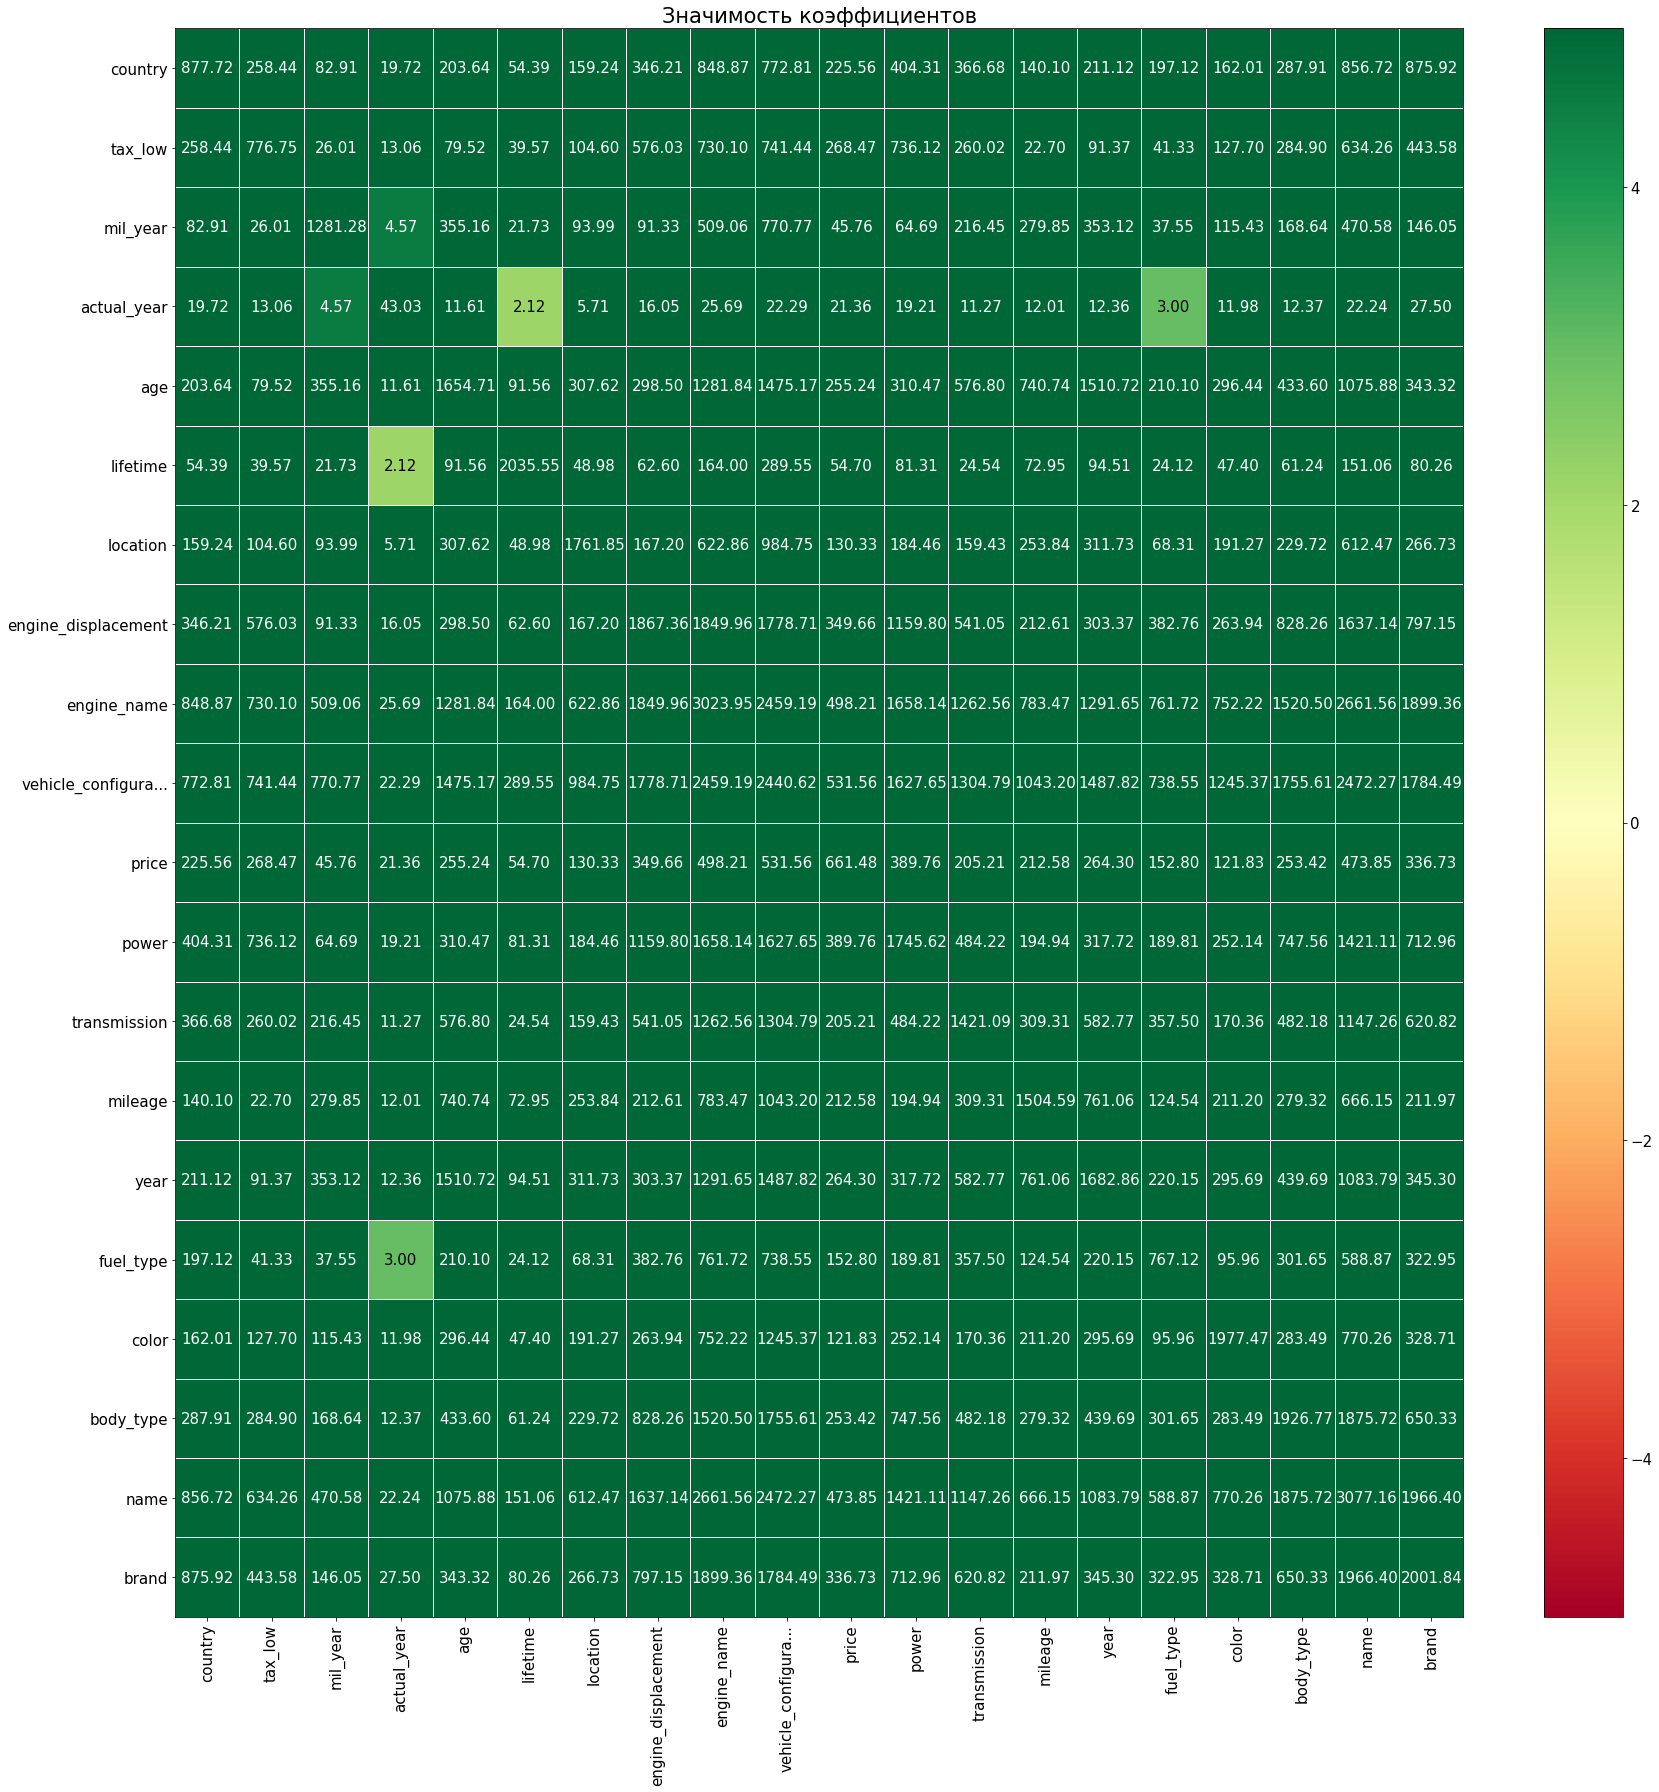

In [628]:
# plot_correlation_matrix(significance_overview.fillna(0).values, 
#                         x_labels=significance_overview.columns, 
#                         y_labels=significance_overview.index, 
#                         vmin=-5, vmax=5, title="Значимость коэффициентов", 
#                         usetex=False, fontsize_factor=1.5, figsize=(25, 25))
# plt.tight_layout()

In [ ]:
df.to_csv('/Users/prime/Documents/data/kaggle/eda_sales_cars.csv', index=False)